## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Random state seed
rseed = 42

## Load and explore data

In [3]:
# Import the dataset
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Check the shape
data.shape

(167, 10)

In [5]:
# Check datatypes & counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Get descriptive statistics
data.describe

<bound method NDFrame.describe of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2    

In [7]:
# Identify any missing data
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [8]:
# Drop any non-numeric features (columns)
data.info() # country is non numeric
data = data.drop('country', axis=1)
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


(167, 9)

In [9]:
data.info() # country is non numeric


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

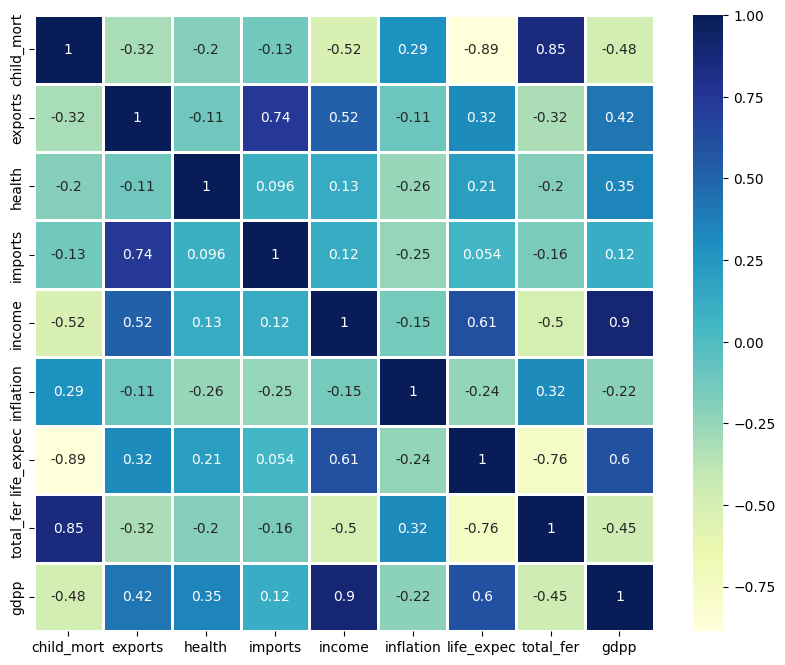

In [10]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', linewidths=1)
data.columns

In [11]:
data.head(1)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


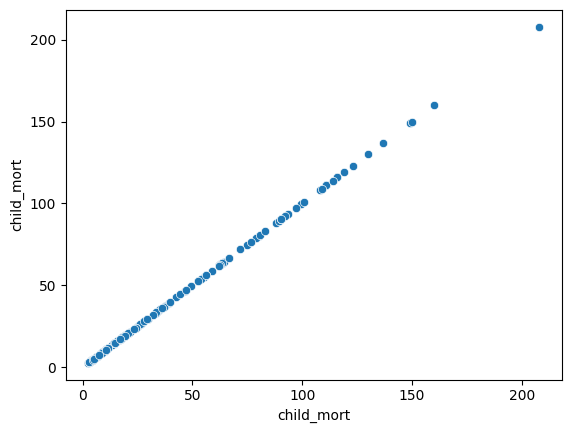

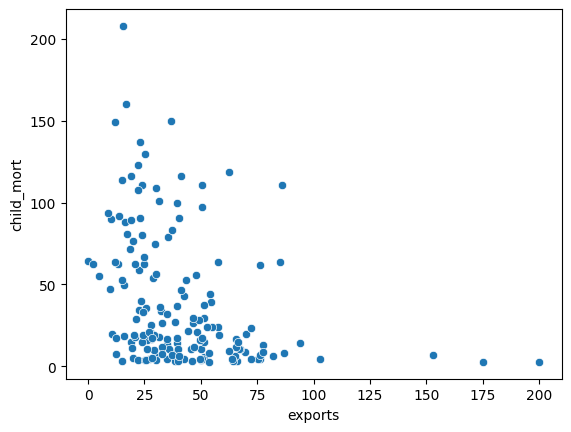

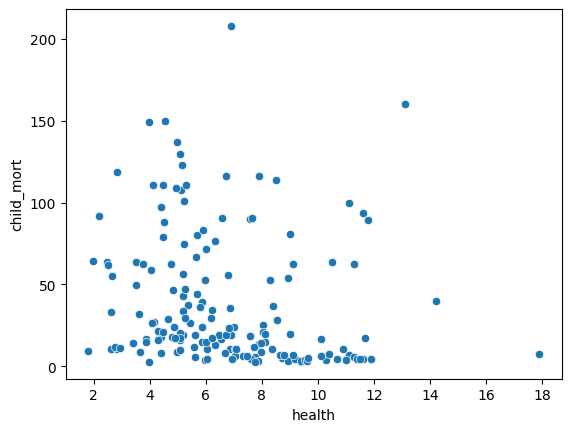

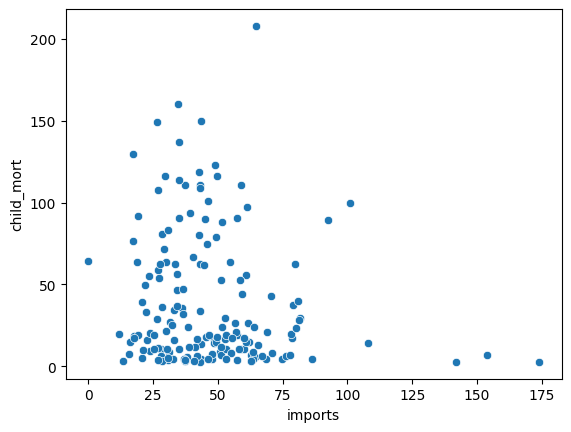

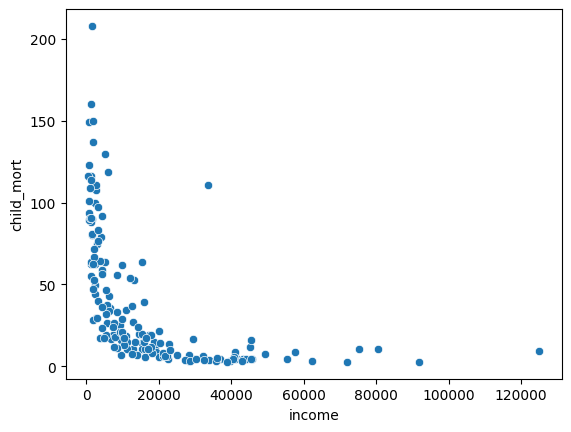

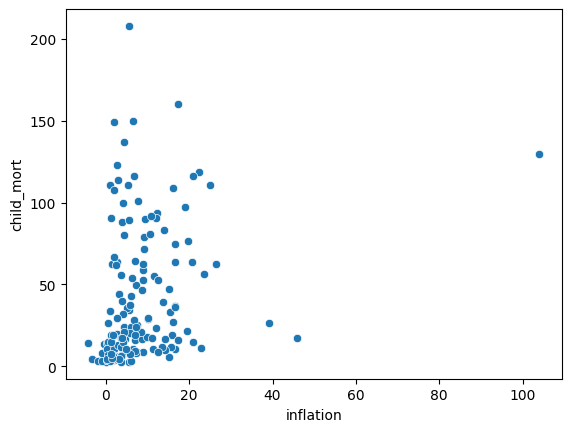

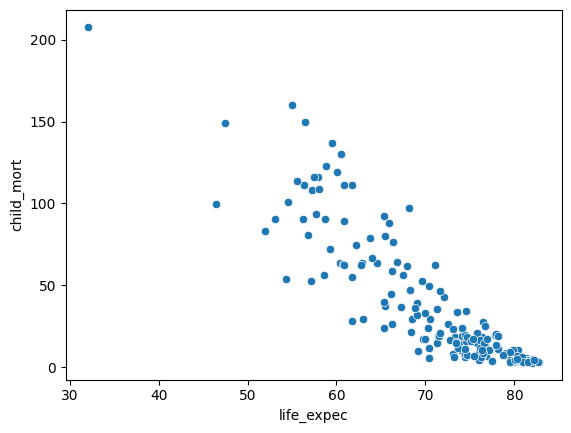

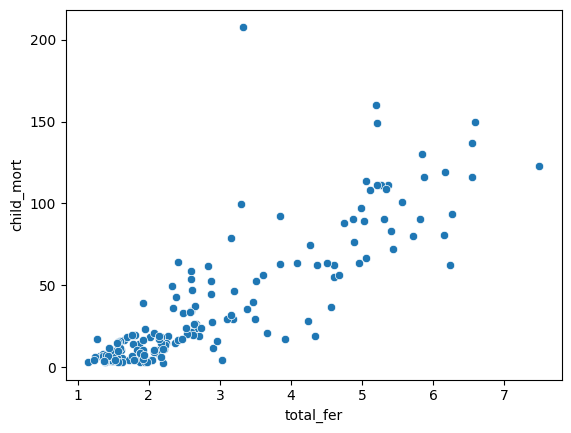

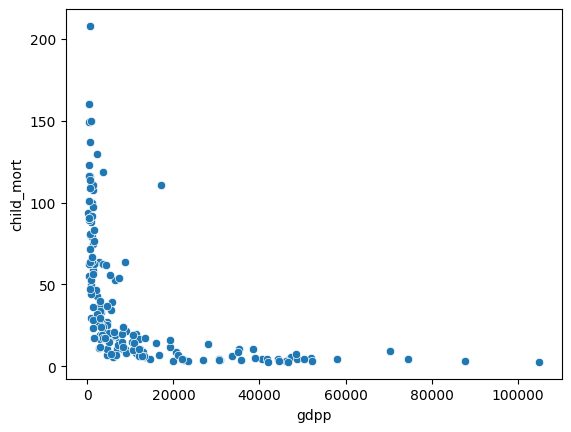

In [12]:
# Explore the continuous independent features against child_mort using scatter plots.

for i in range(0, data.columns.size):
    sns.scatterplot( x=data.iloc[:,i], y=data.iloc[:,0])
    plt.xlabel(data.iloc[:,i].name)
    plt.show()

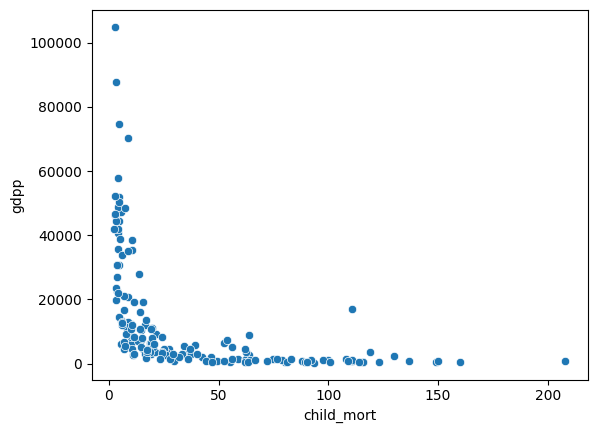

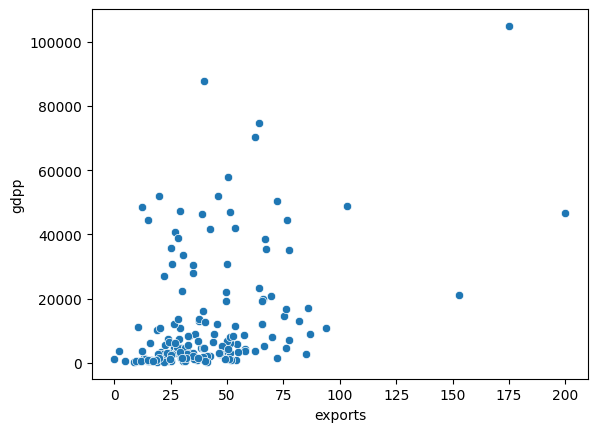

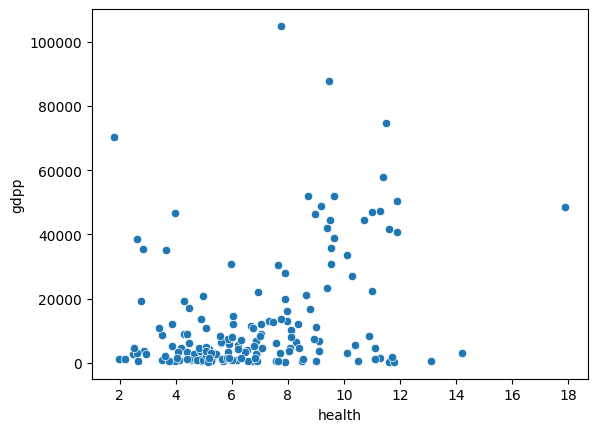

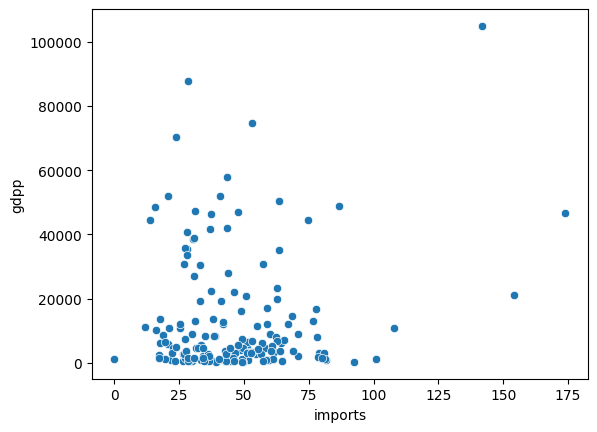

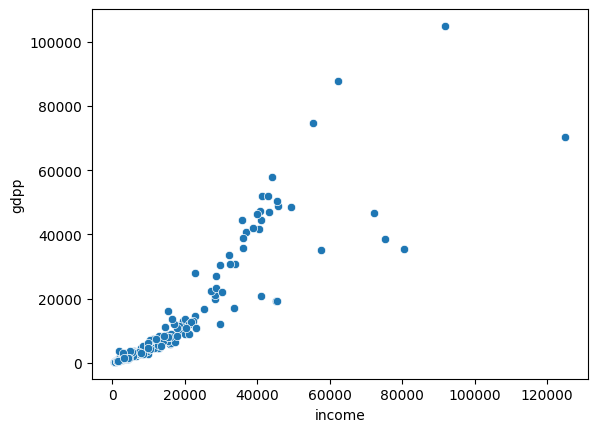

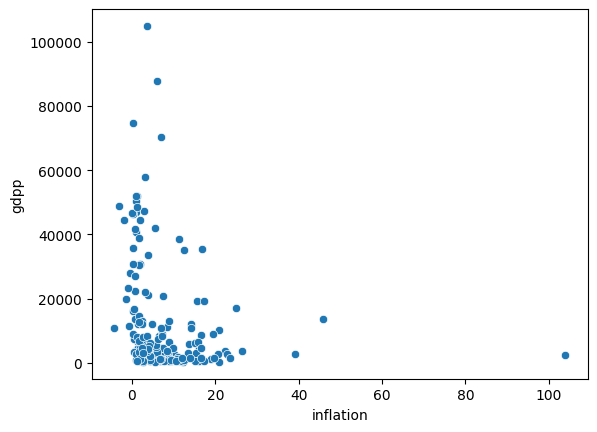

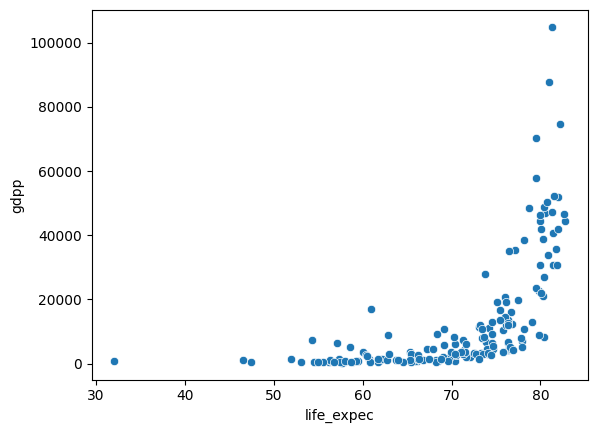

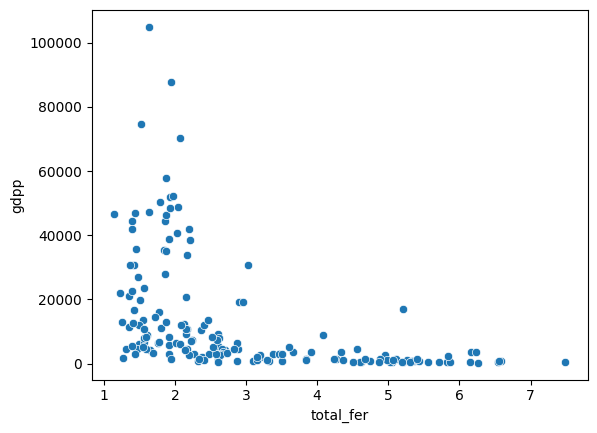

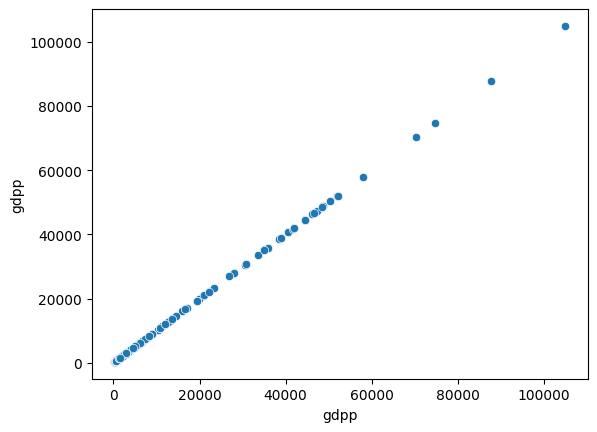

In [13]:
# Explore the continuous independent features against gdpp using scatter plots.

for i in range(0, data.columns.size):
    sns.scatterplot( x=data.iloc[:,i], y=data.iloc[:,8])
    plt.xlabel(data.iloc[:,i].name)
    plt.show()

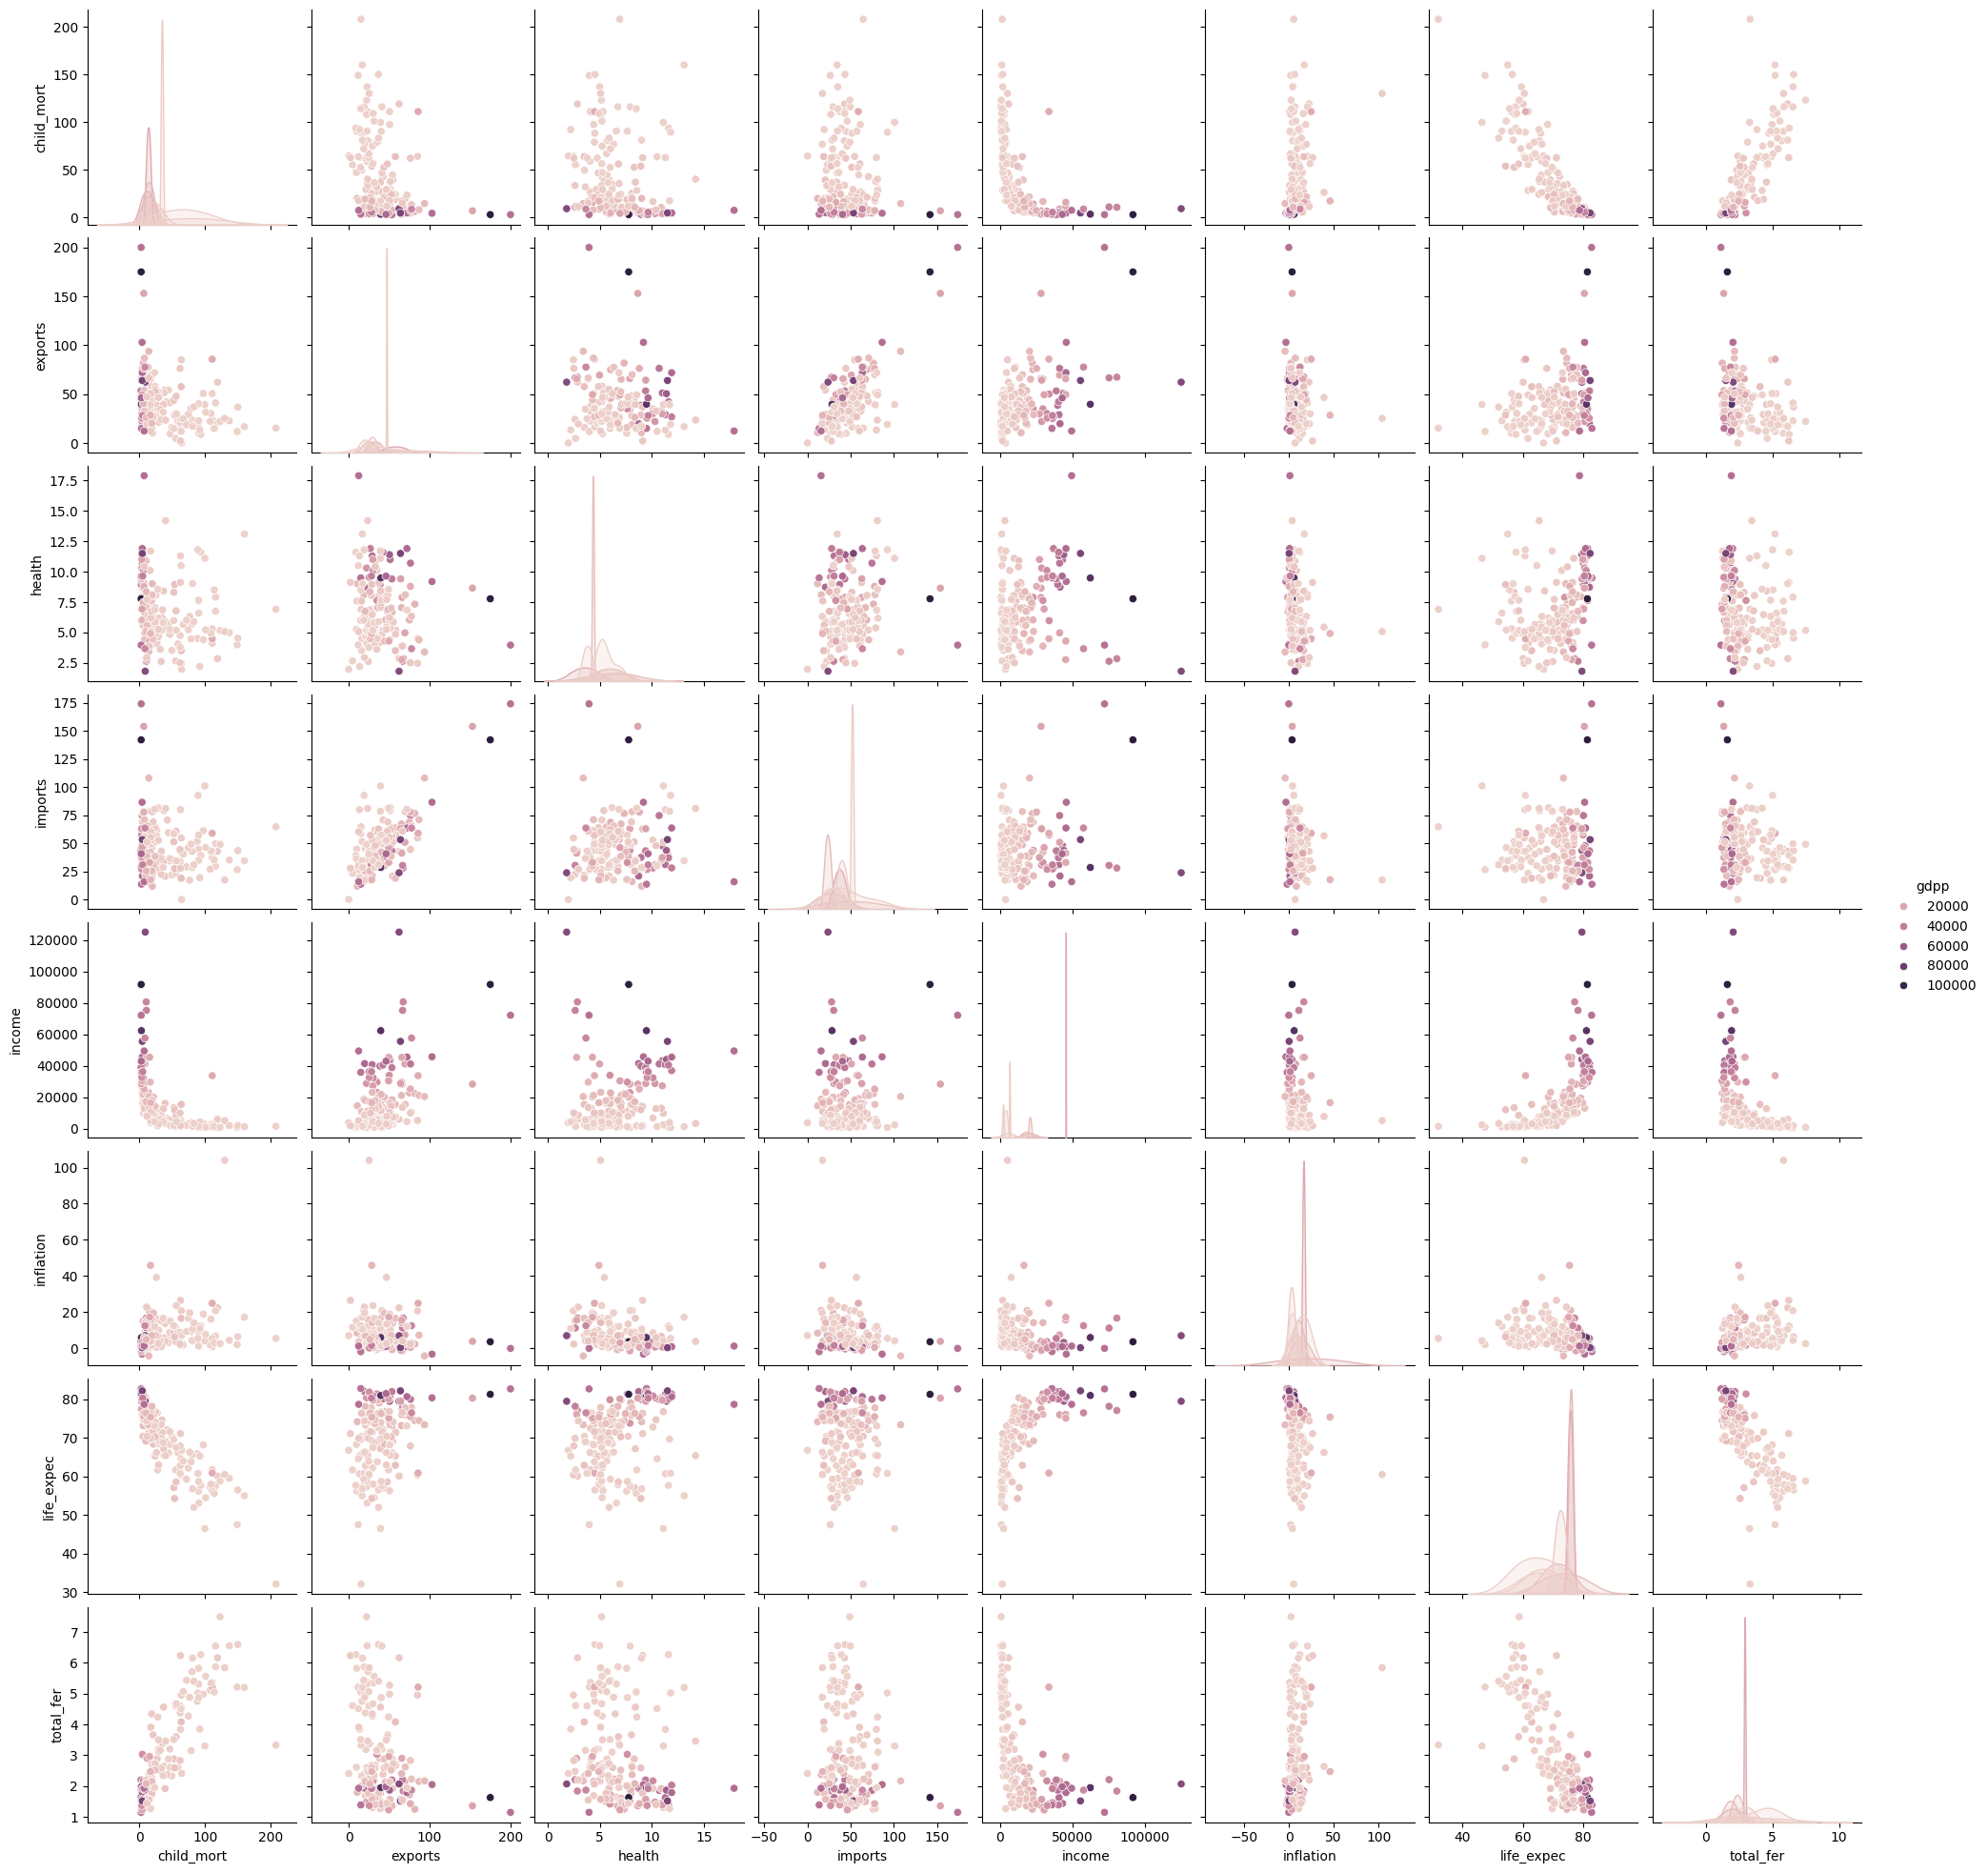

In [14]:
# Create a pair plot
# Hint: Explore seaborn pairplot

sns.pairplot(data, hue='gdpp')

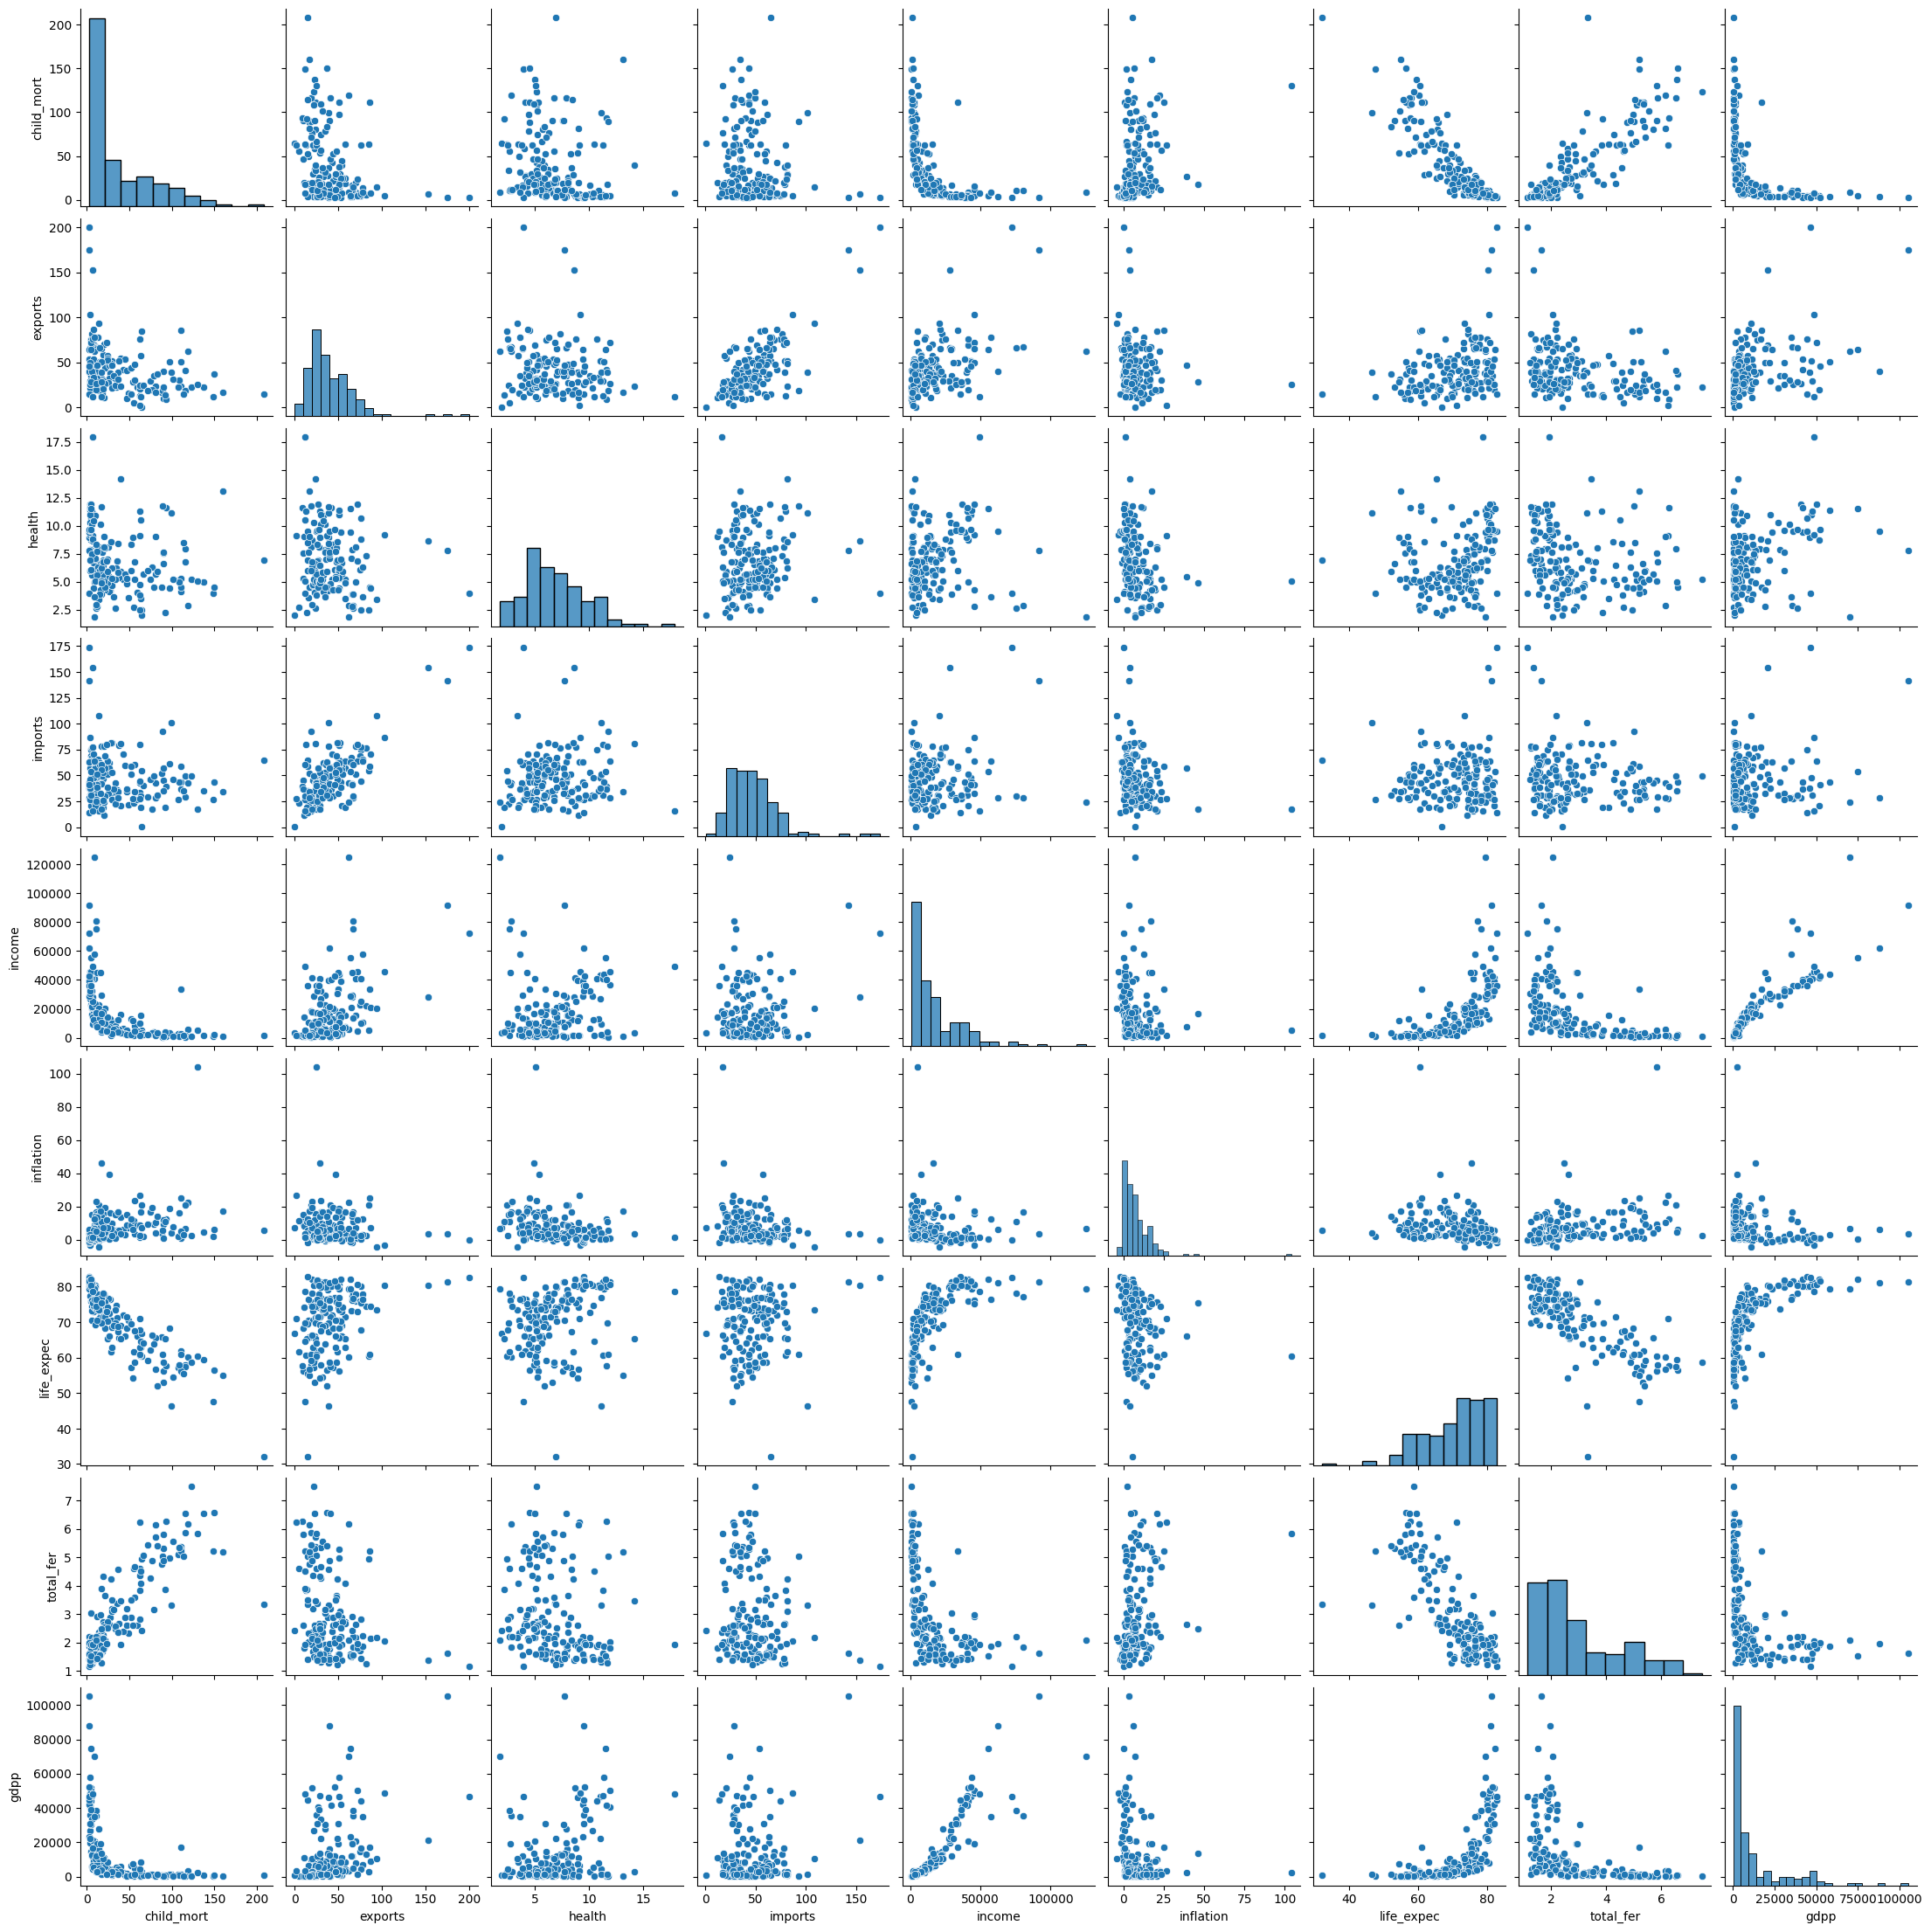

In [15]:
sns.pairplot(data)

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [16]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"
minmax = MinMaxScaler()

df_scaled = minmax.fit_transform(data)
df_scaled = pd.DataFrame(df_scaled, columns=data.columns)

df_scaled.head()



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

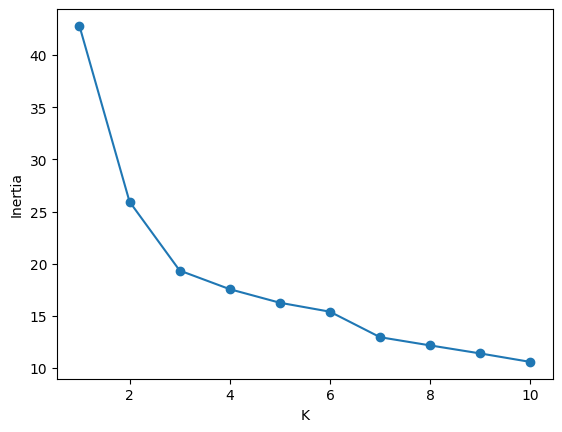

In [17]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset
elbow_Kmeans(df_scaled)

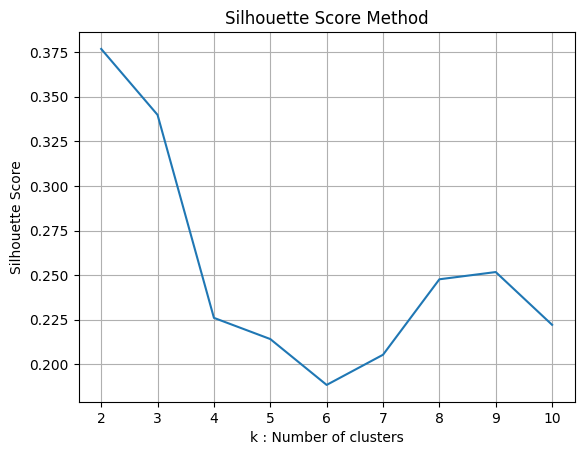

In [18]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

## Fitting a K-Means Model with the selected K value

In [19]:
# Remember to set the random_state to rseed

k = 2
# when k = 2, Silhouette score: 0.377 ---> best
# when k = 3, Silhouette score: 0.340

# X = df_scaled.drop('gdpp', axis=1)
# y=df_scaled['gdpp']
kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [20]:
# Count the number of records in each cluster
kmeans.cluster_centers_


array([[0.40146942, 0.14214329, 0.28504435, 0.25084123, 0.02638133,
        0.14174879, 0.55599785, 0.57384571, 0.01645924],
       [0.06179145, 0.23603364, 0.32390349, 0.27822623, 0.18525772,
        0.09563176, 0.85793533, 0.14105453, 0.17313549]])

In [21]:
# Check model performance with the silhouette coefficient
silhouette_avg = silhouette_score(df_scaled, labels)
print(f"Silhouette score: {silhouette_avg:.3f}")

Silhouette score: 0.377


## Predictions

In [22]:
# Add the predicted cluster label column to the original dataframe
data['Predicted cluster'] = labels
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Predicted cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


## Visualisation of clusters

In [23]:
kmeans.cluster_centers_

array([[0.40146942, 0.14214329, 0.28504435, 0.25084123, 0.02638133,
        0.14174879, 0.55599785, 0.57384571, 0.01645924],
       [0.06179145, 0.23603364, 0.32390349, 0.27822623, 0.18525772,
        0.09563176, 0.85793533, 0.14105453, 0.17313549]])

In [24]:
df_scaled.head(1)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073


Text(0, 0.5, 'GDPP')

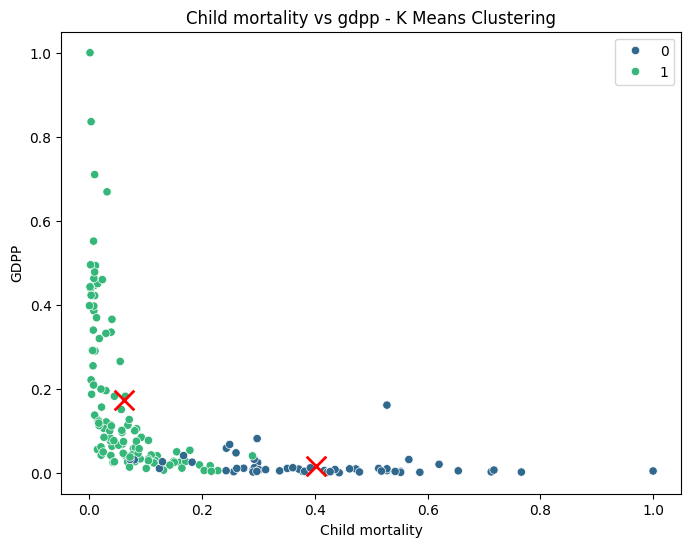

In [25]:
# Visualisation of clusters: child mortality vs gdpp

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_scaled.iloc[:,0], y=df_scaled.iloc[:,8], hue=labels, palette='viridis' )
plt.title("Child mortality vs gdpp - K Means Clustering")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 8], marker='x' , linewidths=2, color="red", s=200 )
plt.xlabel("Child mortality")
plt.ylabel("GDPP")

Text(0, 0.5, 'GDPP')

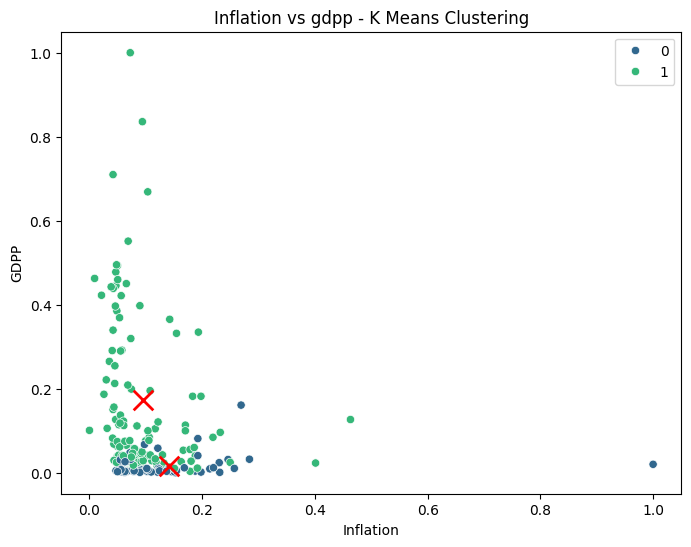

In [26]:
# Visualisation of clusters: inflation vs gdpp

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_scaled.iloc[:,5], y=df_scaled.iloc[:,8], hue=labels, palette='viridis' )
plt.title("Inflation vs gdpp - K Means Clustering")
plt.scatter(kmeans.cluster_centers_[:, 5], kmeans.cluster_centers_[:, 8], marker='x' , linewidths=2, color="red", s=200 )
plt.xlabel("Inflation")
plt.ylabel("GDPP")

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**

From the Child mortality vs GDPP plot we see that there is a higher rate of mortality for those in the low GDPP.
As the GDPP increases, so the child mortality rate decreases

From the inflation vs GDPP plot we see a similar trend from GDPP such that as GDPP increases, there is a reduction in mortality rate.

From the graphs we can seperate the clusters into 2 seperate contries, one with a developed or developing society with average or more income which implies a lower child mortality rate / low rates of inflation.
The other is a lower developed / low income country which will be affected by a higher child mortality rate / inflation rate.